In [1]:
#!pip3 install --upgrade numpy 

In [2]:
#importing packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sweetviz
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, roc_curve, recall_score, precision_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,PowerTransformer
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold,RepeatedKFold,GridSearchCV
import warnings
import time
from imblearn.over_sampling import ADASYN 
from collections import Counter
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_rows", 999)


In [4]:
df_loan = pd.read_excel("loan_data_eda.xlsx")
df_loan.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648,2120,Laborers,1,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260,2531,Laborers,1,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970,477,Laborers,2,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,365243,7427,3514,Unknown_occupation,2,WEDNESDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,10197,679,4427,738,Core staff,3,SATURDAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_loan.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
df_loan['TARGET'].value_counts(normalize=True)

0    0.921017
1    0.078983
Name: TARGET, dtype: float64

In [7]:
df_loan.shape

(207589, 47)

In [8]:
df_loan.isna().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000000
WEEKDAY_APPR_PROCESS_START     0.881092
HOUR_APPR_PROCESS_START        1.000000


In [9]:
df_loan=df_loan[df_loan.columns[df_loan.isnull().mean() < 0.8]]

In [10]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207589 entries, 0 to 207588
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  207589 non-null  int64  
 1   TARGET                      207589 non-null  int64  
 2   NAME_CONTRACT_TYPE          207589 non-null  object 
 3   CODE_GENDER                 207589 non-null  object 
 4   FLAG_OWN_CAR                207589 non-null  object 
 5   FLAG_OWN_REALTY             207589 non-null  object 
 6   CNT_CHILDREN                207589 non-null  int64  
 7   AMT_INCOME_TOTAL            207589 non-null  float64
 8   AMT_CREDIT                  207589 non-null  float64
 9   AMT_ANNUITY                 207589 non-null  float64
 10  AMT_GOODS_PRICE             207589 non-null  float64
 11  NAME_TYPE_SUITE             207589 non-null  object 
 12  NAME_INCOME_TYPE            207589 non-null  object 
 13  NAME_EDUCATION

In [11]:
df_loan.drop('SK_ID_CURR',axis=1,inplace=True)

In [12]:
num_cols=df_loan.select_dtypes(include=['int32','int64','float64']).columns.tolist()

In [13]:
num_cols

['TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS']

In [14]:
cat_cols=df_loan.select_dtypes(include=['object']).columns.tolist()

In [15]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [16]:
#chi2_contingency(pd.crosstab(df_loan['TARGET'],df_loan['EMERGENCYSTATE_MODE']))

In [17]:
#df_loan_filtered.dropna(inplace=True)

In [18]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

for cols in cat_cols:
    df_loan[cols]= label_encoder.fit_transform(df_loan[cols])

In [19]:
# this will evaluate models, calculate ROC and generate confusion matrix
def evaluate_model(model,df_model,model_type,plt_color, X_train, y_train, X_test, y_test):
    y_train_pred= model.predict(X_train)
    y_test_pred= model.predict(X_test)
    train_roc=roc_auc_score(y_train,y_train_pred)
    test_roc=roc_auc_score(y_test,y_test_pred)
    print("Train Evaluation Score:- ")
    print("ROC AUC Score:-", "{:.2f}".format(train_roc))
    print("Confusion Matrix:- ")
    df_eval = pd.DataFrame(confusion_matrix(y_train, y_train_pred),
                          columns=['Predicted Negative','Predicted Positive'],
                          index = ['Actual Negative','Actual Positive'])
    print(df_eval)
    print("Test Evaluation Score:- ")
    print("ROC AUC Score:-", "{:.2f}".format(test_roc))
    print("Confusion Matrix:- ")
    df_eval = pd.DataFrame(confusion_matrix(y_test, y_test_pred),
                          columns=['Predicted Negative','Predicted Positive'],
                          index = ['Actual Negative','Actual Positive'])
    print(df_eval)

    y_pred_train_proba = model.predict_proba(X_train)[:,1] 
    y_test_proba = model.predict_proba(X_test)
    #Accuracy = metrics.accuracy_score(y_pred=y_pred_l1, y_true=y_test)
    precision = precision_score(y_train, y_train_pred, average='binary')
    recall = recall_score(y_train, y_train_pred, average='binary')
    #test_roc = roc_auc_score(y_test, y_test_proba)
    df_model = df_model.append(pd.DataFrame({'Model': [model_type],'Accuracy':  [metrics.accuracy_score(y_pred=y_train_pred, y_true=y_train)],'Precision':[precision],'Recall':[recall],'F1':[metrics.f1_score(y_pred=y_train_pred, y_true=y_train)],'ROC':[train_roc], 'Test_ROC':[test_roc] }))
    # Plotting ROC AUC Score
    #y_test_proba = model.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    
    fpr1, tpr1, thresh1 = roc_curve(y_test,y_test_proba[:,1], pos_label=1)
    random_probs=[0 for i in range(len(y_test))]
    p_fpr, p_tpr , _ = roc_curve(y_test, random_probs, pos_label=1)
    plt.style.use('seaborn')
    plt.plot(fpr1, tpr1, linestyle='--', color=plt_color, label=model_type)
    plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
    #plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show
    
    return df_model

In [20]:
#Create a dataframe to store results
df_model = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','F1','ROC','Test_ROC'])

In [21]:
y= df_loan.pop('TARGET') #class variable-- target variable
X = df_loan#features
sm = ADASYN(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [22]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 194014, 0: 191193})


In [23]:
from sklearn import model_selection
X_train, X_test, y_train, y_test =  model_selection.train_test_split(X_res, y_res, test_size=0.2, random_state = 42)

from keras.utils import np_utils
from imblearn import over_sampling
ada = over_sampling.ADASYN(sampling_strategy='minority')
# fit and apply the transform
X, y = ada.fit_resample(X_train, y_train)
# X is the feature set and y is the target
rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
for train_index, test_index in rkf.split(X,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

### Hypertuning Logistic Regression

In [24]:
#logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold
clf=linear_model.LogisticRegression()
num_C = list(np.power(10.0, np.arange(-10, 10)))
cv_num = KFold(n_splits=5, shuffle=True, random_state=42)
grid={"C":num_C, "penalty":["l1","l2"]}
gridsearch = GridSearchCV(clf, grid,cv=cv_num) #hypertuning with C and penalty term 
gridsearch.fit(X_train, y_train)
#Get best hyperparameters
print(gridsearch.best_params_)



{'C': 1e-08, 'penalty': 'l2'}


Train Evaluation Score:- 
ROC AUC Score:- 0.57
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative               90406               62370
Actual Positive               70638               84751
Test Evaluation Score:- 
ROC AUC Score:- 0.57
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative               22883               15534
Actual Positive               17620               21005


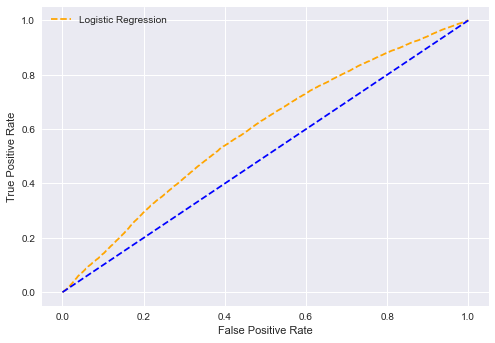

In [25]:
c= gridsearch.best_params_['C']
penalty=gridsearch.best_params_['penalty']
lr = linear_model.LogisticRegression(C=c,penalty=penalty)
lr.fit(X_train, y_train)

df_model=evaluate_model(lr,df_model,'Logistic Regression','orange', X_train, y_train, X_test, y_test)

### Hypertuning Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
dtree = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = params, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
dtree_random = GridSearchCV(estimator = dtree, param_grid = params, cv = 3,n_jobs = -1)# Fit the random search model
dtree_random.fit(X_train, y_train)
dtree_random.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 10}

Train Evaluation Score:- 
ROC AUC Score:- 0.90
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative              137240               15536
Actual Positive               15802              139587
Test Evaluation Score:- 
ROC AUC Score:- 0.82
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative               31540                6877
Actual Positive                6699               31926


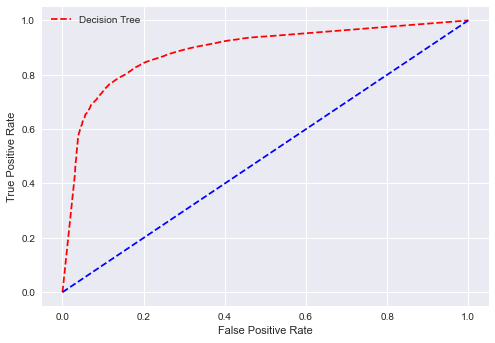

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(min_samples_leaf=5,max_depth=20,criterion='gini',  random_state=42) 
dt.fit(X_train, y_train) 
df_model=evaluate_model(dt,df_model,'Decision Tree','red', X_train, y_train, X_test, y_test)


### Hypertuning RandomForest

In [28]:
from sklearn.model_selection import GridSearchCV# Number of trees in random forest
n_estimators = [50,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [20,30,40]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 5]
# Method of selecting samples for training each tree
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid,cv=3,  verbose=2, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)
rf_random.best_params_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


{'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

Train Evaluation Score:- 
ROC AUC Score:- 0.98
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative              151658                1118
Actual Positive                4836              150553
Test Evaluation Score:- 
ROC AUC Score:- 0.90
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative               35797                2620
Actual Positive                4760               33865


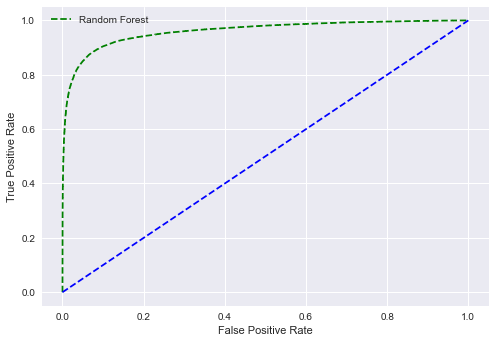

In [29]:
from sklearn.ensemble import RandomForestClassifier
# Create the model with 100 trees
RF_model = RandomForestClassifier(n_estimators=100, 
                                  min_samples_split=10,
                                  min_samples_leaf=5,
                                    bootstrap = False,
                                  max_depth=40,
                            max_features = 'sqrt', random_state=42)
# Fit on training data
RF_model.fit(X_train, y_train)
df_model=evaluate_model(RF_model,df_model,'Random Forest','green', X_train, y_train, X_test, y_test)

### Hypertuning Adaboost

In [30]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [50,100,200,300]
}
adaboost = AdaBoostClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#dtree_random = RandomizedSearchCV(estimator = dtree, param_distributions = params, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
adaboost_random = GridSearchCV(estimator = adaboost, param_grid = params, cv = 3,n_jobs = -1)# Fit the random search model
adaboost_random.fit(X_train, y_train)
adaboost_random.best_params_

{'n_estimators': 300}

Train Evaluation Score:- 
ROC AUC Score:- 0.86
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative              134576               18200
Actual Positive               23765              131624
Test Evaluation Score:- 
ROC AUC Score:- 0.86
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative               33866                4551
Actual Positive                6152               32473


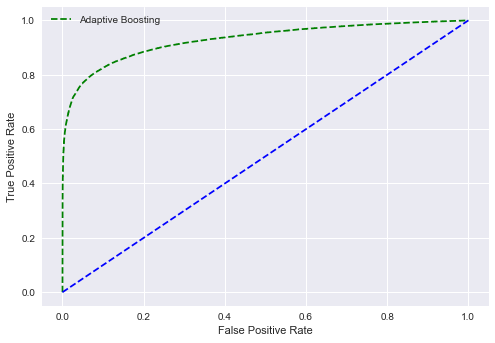

In [31]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=300, random_state=42)
adaboost.fit(X_train, y_train)
df_model=evaluate_model(adaboost,df_model,'Adaptive Boosting','green', X_train, y_train, X_test, y_test)

### Hypertune XGBoost

In [32]:
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200, eval_metric='logloss')

# set up GridSearchCV()
model_grid = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = 3, 
                        verbose = 2,
                        return_train_score=True) 
model_grid.fit(X_train, y_train)
model_grid.best_params_

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...................learning_rate=0.2, subsample=0.3; total time=  15.5s
[CV] END ...................learning_rate=0.2, subsample=0.3; total time=  15.3s
[CV] END ...................learning_rate=0.2, subsample=0.3; total time=  15.2s
[CV] END ...................learning_rate=0.2, subsample=0.6; total time=  17.4s
[CV] END ...................learning_rate=0.2, subsample=0.6; total time=  17.3s
[CV] END ...................learning_rate=0.2, subsample=0.6; total time=  17.3s
[CV] END ...................learning_rate=0.2, subsample=0.9; total time=  16.6s
[CV] END ...................learning_rate=0.2, subsample=0.9; total time=  18.4s
[CV] END ...................learning_rate=0.2, subsample=0.9; total time=  16.8s
[CV] END ...................learning_rate=0.6, subsample=0.3; total time=  15.2s
[CV] END ...................learning_rate=0.6, subsample=0.3; total time=  15.3s
[CV] END ...................learning_rate=0.6, su

{'learning_rate': 0.6, 'subsample': 0.9}

Train Evaluation Score:- 
ROC AUC Score:- 0.94
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative              149785                2991
Actual Positive               16773              138616
Test Evaluation Score:- 
ROC AUC Score:- 0.93
Confusion Matrix:- 
                 Predicted Negative  Predicted Positive
Actual Negative               37665                 752
Actual Positive                4412               34213


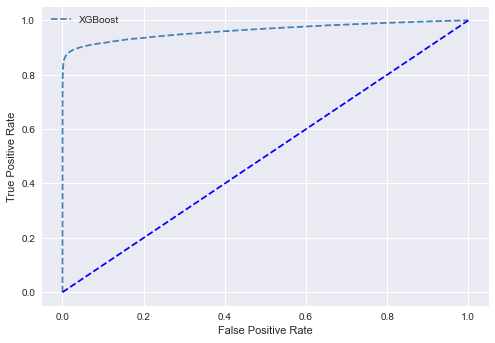

In [33]:
XGBmodel = XGBClassifier(max_depth=2, n_estimators=200, eval_metric='logloss',learning_rate=0.6,subsample=0.9,random_state=42)
XGBmodel.fit(X_train, y_train)
df_model=evaluate_model(XGBmodel,df_model,'XGBoost','steelblue', X_train, y_train, X_test, y_test)

In [34]:
df_model

,Model,Accuracy,Precision,Recall,F1,ROC,Test_ROC
0,Logistic Regression,0.568387,0.576063,0.545412,0.560319,0.568584,0.569733
0,Decision Tree,0.898308,0.899847,0.898307,0.899076,0.898308,0.823777
0,Random Forest,0.980679,0.992629,0.968878,0.98061,0.98078,0.904282
0,Adaptive Boosting,0.863823,0.878524,0.847061,0.862506,0.863966,0.861131
0,XGBoost,0.935866,0.978878,0.892058,0.933454,0.93624,0.933099
